# CGANs - Conditional Generative Adversarial Nets

Brief introduction to Conditional Generative Adversarial Nets or CGANs. This notebook is organized as follows:

1. **Research Paper**
* **Background**
* **Definition**
* **Training CGANs with MNIST dataset, Keras and TensorFlow**


## 1. Research Paper

* [Conditional Generative Adversarial Nets](https://arxiv.org/pdf/1411.1784.pdf)

## 2. Background

**Generative adversarial nets** consists of two models: a generative model $G$ that captures the data distribution, and a discriminative model $D$ that estimates the probability that a sample came from the training data rather than $G$.

The generator distribution $p_g$ over data data $x$, the generator builds a mapping function from a prior noise distribution $p_z(z)$ to data space as $G(z;\theta_g)$.

The discriminator, $D(x;\theta_d)$, outputs a single scalar representing the probability that $x$ came form training data rather than $p_g$.

The **value function** $V(G,D)$:

$$ \underset{G}{min} \: \underset{D}{max} \; V_{GAN}(D,G) = \mathbb{E}_{x\sim p_{data}(x)}[log D(x)] + \mathbb{E}_{z\sim p_{z}(z)}[log(1 - D(G(z)))]$$


## 3. Definition

Generative adversarial nets can be extended to a **conditional model** if both the generator and discriminator are conditioned on some extra information $y$. 

* $y$ could be any kind of auxiliary information, such as class labels or data from other modalities. 

We can perform the conditioning by feeding $y$ into the both the discriminator and generator as additional input layer.

* **Generator**: The prior input noise $p_z(z)$, and $y$ are combined in joint hidden representation, and the adversarial training framework allows for considerable flexibility in how this hidden representation is composed.

* **Discriminator**: $x$ and $y$ are presented as inputs and to a discriminative function.

### Network Design

<img src="../../img/network_design_ccgan.png" width="600"> 


### Cost Funcion

$$ \underset{G}{min} \: \underset{D}{max} \; V_{CGAN}(D,G) = \mathbb{E}_{x\sim p_{data}(x)}[log D(x|y)] + \mathbb{E}_{z\sim p_{z}(z)}[log(1 - D(G(z|y)))]$$


## 4. Training CGANs with MNIST dataset, Keras and TensorFlow

CGANs implementation using fully connected and embedding layers and the [Keras](https://keras.io/) library.

* **Data**
    * Rescale the MNIST images to be between -1 and 1.
    
* **Generator**
    * **Simple fully connected neural network**, **LeakyReLU activation** and **BatchNormalization**.
    * The input to the generator are the **normal distribution** $z$ and $y$. They are combined in joint hidden representation.
        * Embedding($y, z$).
    * The last activation is **tanh**.
    
* **Discriminator**
    * **Simple fully connected neural network** and **LeakyReLU activation**.
    * The input to the discriminator are $x$ and $y$. They are combined in joint hidden representation.
        *  Embedding($y, x$).
    * The last activation is **sigmoid**.
    
* **Loss**
    * binary_crossentropy

* **Optimizer**
    * Adam(lr=lr, beta_1=0.5)

* batch_size = 64
* epochs = 100

### 1. Load data

#### Load libraries

In [10]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive/cgan"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 02_DCGAN_MNIST.ipynb   data
 03_CGAN_MNIST.ipynb    mnist-cgan.ipynb
 0.png		       'text to image code 1.ipynb'
 47.png		       'text to image code 2.ipynb'
 94.png		        Train
 cgan_emist.h5	        TrainFixed_results
 cgan_emist_weight.h5


In [11]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import random
%matplotlib inline
import matplotlib.pyplot as plt


In [12]:
!pip install extra_keras_datasets
from extra_keras_datasets import emnist
from keras.models import Sequential, Model
from keras.layers import Dense, LeakyReLU, BatchNormalization, Conv2DTranspose
from keras.layers import Input, Flatten, Embedding, multiply, Dropout
from keras.optimizers import Adam
from keras import initializers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


---
#### Embedding layer background

1/1 [==============================] - 0s 36ms/step
[[[ 0.02984095 -0.03047401]
  [-0.03237518 -0.01619617]
  [ 0.0062223   0.02519801]
  [-0.04346363  0.02949462]
  [-0.01950313  0.0157251 ]
  [ 0.00498041 -0.03807481]
  [-0.00173706  0.03251095]
  [-0.02172128  0.00972695]
  [-0.03266597 -0.03337975]
  [-0.00087295  0.01190976]
  [ 0.04071082  0.00420574]
  [ 0.02232461  0.01394946]
  [ 0.03388441  0.00281602]
  [ 0.02259275  0.01422704]
  [-0.02573043 -0.02794553]
  [-0.02307369 -0.02219523]
  [ 0.04719699  0.01749558]
  [-0.0199838   0.02701403]
  [-0.02981548 -0.01992293]
  [ 0.03240421  0.01187165]
  [-0.00138301  0.04386473]
  [ 0.03525357 -0.04631523]
  [-0.04890452 -0.03934076]
  [ 0.02902624 -0.00231131]
  [-0.03961154  0.033142  ]
  [ 0.04810249 -0.03062013]
  [-0.01143614 -0.02823311]
  [ 0.04502643 -0.01049374]
  [ 0.0427752  -0.02509861]
  [ 0.00302269 -0.00057075]
  [ 0.03813125  0.00681361]
  [ 0.02251812  0.03769833]
  [-0.03432863  0.03582582]
  [-0.02402607  0.015958

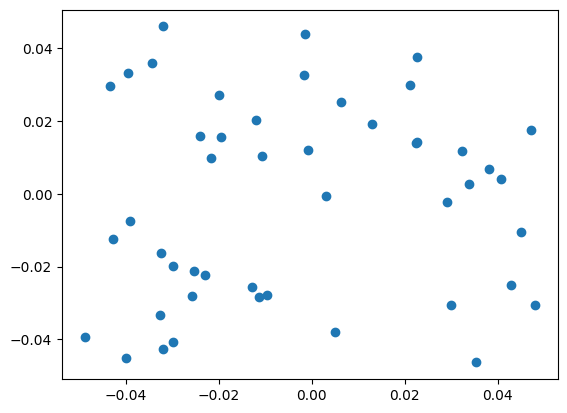

In [13]:
model = Sequential()
model.add(Embedding(47, 2))
# the model will take as input an integer matrix of size (batch, input_length).
# the largest integer (i.e. word index) in the input should be no larger than 999 (vocabulary size).
# now model.output_shape == (None, 10, 64), where None is the batch dimension.

# input_array = np.random.randint(10, size=(1, 10))
input_array = np.arange(0, 47).reshape(1, -1)
model.compile('rmsprop', 'mse')
output_array = model.predict(input_array)
print(output_array)

# print(output_array.shape)
plt.scatter(output_array[0, :, 0], output_array[0, :, 1])

---
#### Getting the data

In [14]:
# load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')

In [15]:
X_train.shape

(112800, 28, 28)

#### Explore visual data

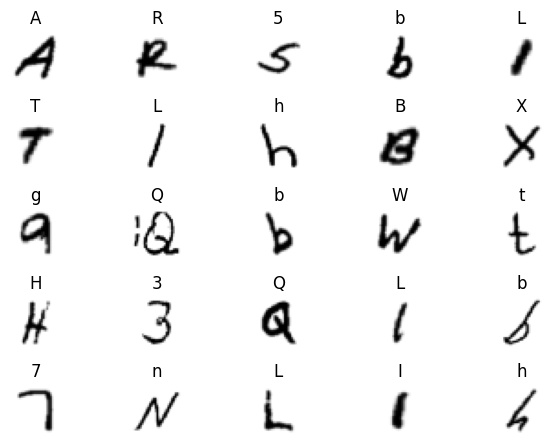

In [16]:
class_idx = ['0','1','2','3','4','5','6','7','8','9',
             'A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z',
             'a','b','d','e','f','g','h','n','q','r','t']
for i in range(25):
    # pick random image index from dataset to show
    index = random.randint(0, len(X_train))
    # define subplot
    plt.subplot(5, 5, 1 + i)
    plt.tight_layout()
    # turn off axis
    plt.axis('off')
    # change to grayscale as our images are in grayscale
    plt.imshow(X_train[index], cmap='gray_r')
    # show image title according to the real dataset classes
    plt.title(class_idx[y_train[index]])

#### Reshaping and normalizing the inputs

In [17]:
print('X_train.shape', X_train.shape)
print('y_train.shape', y_train.shape)

# reshaping the inputs
X_train = X_train.reshape(112800, 28*28)
# normalizing the inputs (-1, 1)
X_train = (X_train.astype('float32') / 255 - 0.5) * 2

print('X_train reshape:', X_train.shape)

X_train.shape (112800, 28, 28)
y_train.shape (112800,)
X_train reshape: (112800, 784)


In [32]:
print('X_test.shape', X_test.shape)
print('y_test.shape', y_test.shape)

# reshaping the inputs
X_test = X_test.reshape(18800, 28*28)
# normalizing the inputs (-1, 1)
X_test = (X_test.astype('float32') / 255 - 0.5) * 2

print('X_test reshape:', X_test.shape)

X_test.shape (18800, 28, 28)
y_test.shape (18800,)
X_test reshape: (18800, 784)


In [39]:
test_label = keras.utils.to_categorical(y_test)

### 2. Define model

#### Generator

In [18]:
# latent space dimension
latent_dim = 100

# imagem dimension 28x28
img_dim = 784

init = initializers.RandomNormal(stddev=0.02)

# Generator network
generator = Sequential()

# Input layer and hidden layer 1
generator.add(Dense(128, input_shape=(latent_dim,), kernel_initializer=init))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))

# Hidden layer 2
generator.add(Dense(256))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))

# Hidden layer 3
generator.add(Dense(512))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))

# Output layer 
generator.add(Dense(img_dim, activation='tanh'))

#### Generator model visualization

In [19]:
# prints a summary representation of your model
generator.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               12928     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128)               0         
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 256)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                      

#### Conditional G model
The prior input noise $p_z(z)$, and $y$ are combined in joint hidden representation.

In [20]:
# Embedding condition in input layer
num_classes = 47

# Create label embeddings
label = Input(shape=(1,), dtype='int32')
label_embedding = Embedding(num_classes, latent_dim)(label)
label_embedding = Flatten()(label_embedding)

# latent space
z = Input(shape=(latent_dim,))

# Merge inputs (z x label)
input_generator = multiply([z, label_embedding])

# Output image
img = generator(input_generator)

# Generator with condition input
generator = Model([z, label], img)

#### Conditional model visualization

In [21]:
# prints a summary representation of your model
generator.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 1, 100)       4700        ['input_1[0][0]']                
                                                                                                  
 input_2 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 flatten (Flatten)              (None, 100)          0           ['embedding_2[0][0]']            
                                                                                              

#### Discriminator

In [22]:
# Discriminator network
discriminator = Sequential()

# Input layer and hidden layer 1
discriminator.add(Dense(128, input_shape=(img_dim,), kernel_initializer=init))
discriminator.add(LeakyReLU(alpha=0.2))

# Hidden layer 2
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(alpha=0.2))

# Hidden layer 3
discriminator.add(Dense(512))
discriminator.add(LeakyReLU(alpha=0.2))

# Output layer
discriminator.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


#### Discriminator model visualization

In [23]:
# prints a summary representation of your model
discriminator.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               33024     
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 512)               131584    
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                

#### Conditional D model

$x$ and $y$ are presented as inputs

In [24]:
# Embedding condition in input layer

# Create label embeddings
label_d = Input(shape=(1,), dtype='int32')
label_embedding_d = Embedding(num_classes, img_dim)(label_d)
label_embedding_d = Flatten()(label_embedding_d)

# imagem dimension 28x28
img_d = Input(shape=(img_dim,))

# Merge inputs (img x label)
input_discriminator = multiply([img_d, label_embedding_d])

# Output image
validity = discriminator(input_discriminator)

# Discriminator with condition input
discriminator = Model([img_d, label_d], validity)

#### Conditional model visualization

In [25]:
# prints a summary representation of your model
discriminator.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding_3 (Embedding)        (None, 1, 784)       36848       ['input_3[0][0]']                
                                                                                                  
 input_4 (InputLayer)           [(None, 784)]        0           []                               
                                                                                                  
 flatten_1 (Flatten)            (None, 784)          0           ['embedding_3[0][0]']            
                                                                                            

### 3. Compile model

#### Compile discriminator

In [26]:
# Optimizer
global_step = tf.Variable(0, trainable=False)
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0002,
    decay_steps=500,
    decay_rate=0.95,
    staircase=True
)
lr = lr_schedule(global_step)

optimizer = Adam(lr=lr, beta_1=0.5)

discriminator.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


#### Combined network

In [27]:
discriminator.trainable = False

validity = discriminator([generator([z, label]), label])

d_g = Model([z, label], validity)

d_g.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])

In [28]:
# prints a summary representation of your model
d_g.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 model (Functional)             (None, 784)          588012      ['input_2[0][0]',                
                                                                  'input_1[0][0]']                
                                                                                                  
 model_1 (Functional)           (None, 1)            302449      ['model[0][0]',            

### 4. Fit model


epoch = 1/300, d_loss=0.490, g_loss=1.381                                                                                                     
2/2 [==============================] - 0s 5ms/step


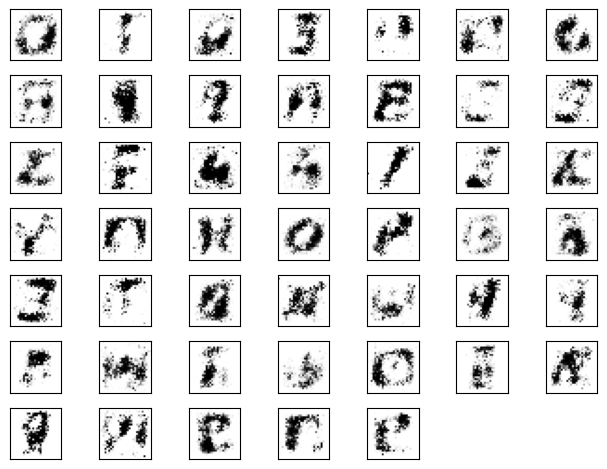

epoch = 2/300, d_loss=0.593, g_loss=1.027                                                                                                     
epoch = 3/300, d_loss=0.645, g_loss=0.952                                                                                                     
epoch = 4/300, d_loss=0.645, g_loss=0.939                                                                                                     
epoch = 5/300, d_loss=0.662, g_loss=0.980                                                                                                     
epoch = 6/300, d_loss=0.696, g_loss=1.009                                                                                                     
epoch = 7/300, d_loss=0.652, g_loss=0.975                                                                                                     
epoch = 8/300, d_loss=0.645, g_loss=0.938                                                                                                     

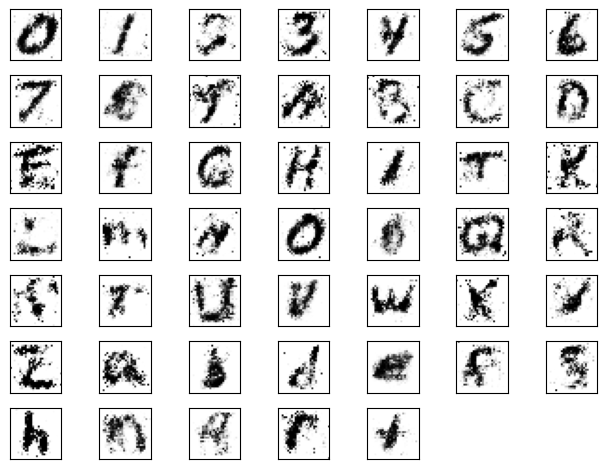

epoch = 49/300, d_loss=0.641, g_loss=0.956                                                                                                     
epoch = 50/300, d_loss=0.649, g_loss=0.961                                                                                                     
epoch = 51/300, d_loss=0.662, g_loss=0.970                                                                                                     
epoch = 52/300, d_loss=0.645, g_loss=0.941                                                                                                     
epoch = 53/300, d_loss=0.644, g_loss=0.981                                                                                                     
epoch = 54/300, d_loss=0.624, g_loss=0.914                                                                                                     
epoch = 55/300, d_loss=0.662, g_loss=0.965                                                                                              

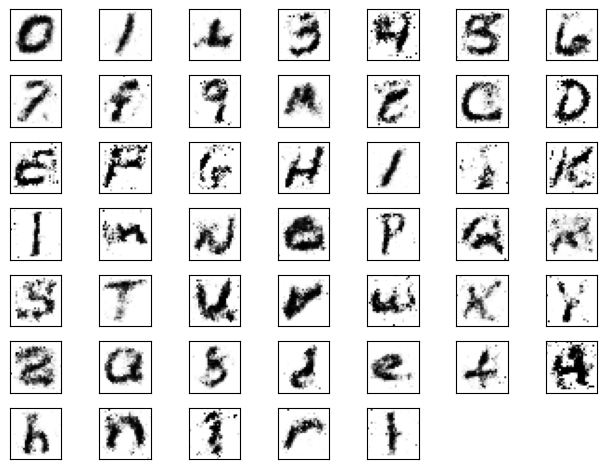

epoch = 96/300, d_loss=0.656, g_loss=1.015                                                                                                     
epoch = 97/300, d_loss=0.646, g_loss=0.903                                                                                                     
epoch = 98/300, d_loss=0.668, g_loss=0.991                                                                                                     
epoch = 99/300, d_loss=0.660, g_loss=1.013                                                                                                     
epoch = 100/300, d_loss=0.662, g_loss=0.930                                                                                                     
epoch = 101/300, d_loss=0.640, g_loss=0.950                                                                                                     
epoch = 102/300, d_loss=0.667, g_loss=0.988                                                                                           

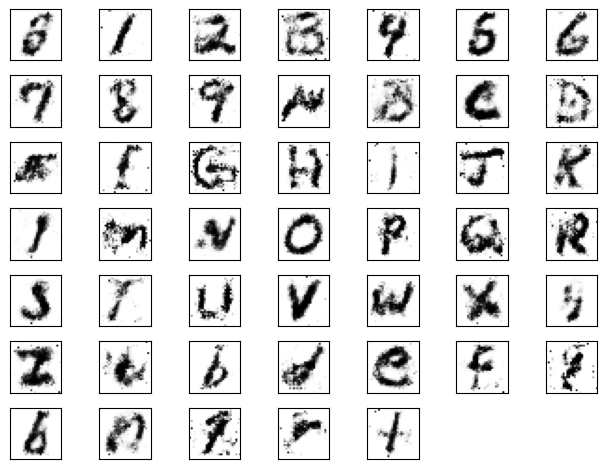

epoch = 143/300, d_loss=0.670, g_loss=0.992                                                                                                     
epoch = 144/300, d_loss=0.661, g_loss=0.964                                                                                                     
epoch = 145/300, d_loss=0.669, g_loss=1.037                                                                                                     
epoch = 146/300, d_loss=0.659, g_loss=0.995                                                                                                     
epoch = 147/300, d_loss=0.688, g_loss=1.016                                                                                                     
epoch = 148/300, d_loss=0.669, g_loss=1.108                                                                                                     
epoch = 149/300, d_loss=0.700, g_loss=1.043                                                                                       

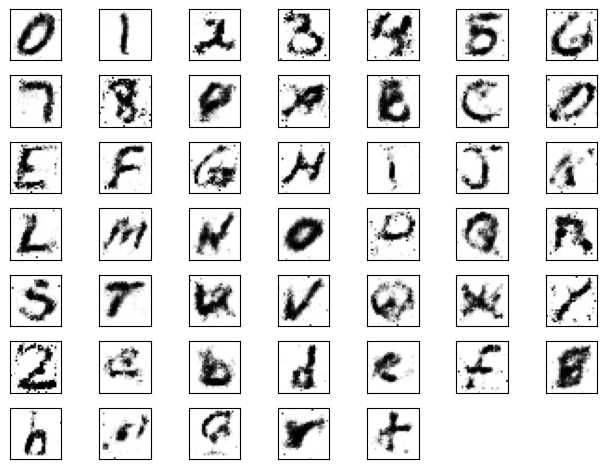

epoch = 190/300, d_loss=0.652, g_loss=1.122                                                                                                     
epoch = 191/300, d_loss=0.629, g_loss=1.026                                                                                                     
epoch = 192/300, d_loss=0.648, g_loss=1.020                                                                                                     
epoch = 193/300, d_loss=0.608, g_loss=1.138                                                                                                     
epoch = 194/300, d_loss=0.669, g_loss=1.175                                                                                                     
epoch = 195/300, d_loss=0.641, g_loss=1.147                                                                                                     
epoch = 196/300, d_loss=0.678, g_loss=1.131                                                                                       

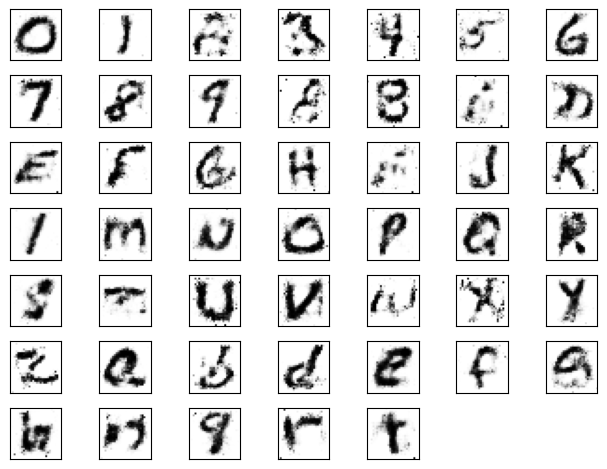

epoch = 237/300, d_loss=0.668, g_loss=1.271                                                                                                     
epoch = 238/300, d_loss=0.610, g_loss=1.240                                                                                                     
epoch = 239/300, d_loss=0.655, g_loss=1.181                                                                                                     
epoch = 240/300, d_loss=0.614, g_loss=1.201                                                                                                     
epoch = 241/300, d_loss=0.663, g_loss=1.259                                                                                                     
epoch = 242/300, d_loss=0.633, g_loss=1.154                                                                                                     
epoch = 243/300, d_loss=0.697, g_loss=1.143                                                                                       

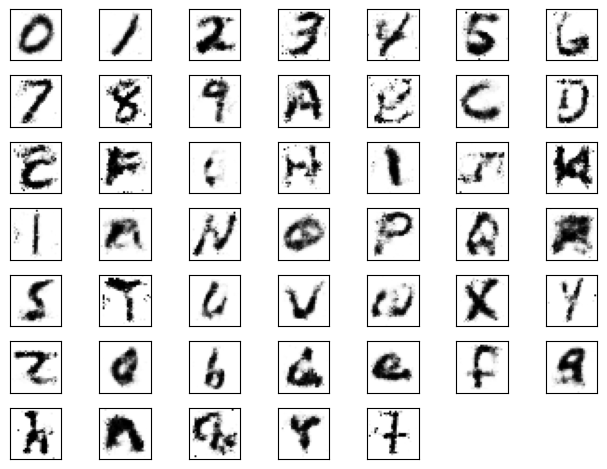

epoch = 284/300, d_loss=0.612, g_loss=1.300                                                                                                     
epoch = 285/300, d_loss=0.652, g_loss=1.252                                                                                                     
epoch = 286/300, d_loss=0.619, g_loss=1.213                                                                                                     
epoch = 287/300, d_loss=0.606, g_loss=1.193                                                                                                     
epoch = 288/300, d_loss=0.601, g_loss=1.293                                                                                                     
epoch = 289/300, d_loss=0.649, g_loss=1.127                                                                                                     
epoch = 290/300, d_loss=0.600, g_loss=1.166                                                                                       

<Figure size 640x480 with 0 Axes>

In [29]:
epochs = 300
batch_size = 64
smooth = 0.1

real = np.ones(shape=(batch_size, 1))
fake = np.zeros(shape=(batch_size, 1))

d_loss = []
d_g_loss = []

for e in range(epochs + 1):
    for i in range(len(X_train) // batch_size):
        
        # Train Discriminator weights
        discriminator.trainable = True
        
        # Real samples
        X_batch = X_train[i*batch_size:(i+1)*batch_size]
        real_labels = y_train[i*batch_size:(i+1)*batch_size].reshape(-1, 1)
        
        d_loss_real = discriminator.train_on_batch(x=[X_batch, real_labels], y=real * (1 - smooth))
        
        # Fake Samples
        z = np.random.normal(loc=0, scale=1, size=(batch_size, latent_dim))
        random_labels = np.random.randint(0, 47, batch_size).reshape(-1, 1)
        X_fake = generator.predict_on_batch([z, random_labels])
        
        d_loss_fake = discriminator.train_on_batch(x=[X_fake, random_labels], y=fake)
         
        # Discriminator loss
        d_loss_batch = 0.5 * (d_loss_real[0] + d_loss_fake[0])
        
        # Train Generator weights
        discriminator.trainable = False
        
        z = np.random.normal(loc=0, scale=1, size=(batch_size, latent_dim))
        random_labels = np.random.randint(0, 47, batch_size).reshape(-1, 1)
        d_g_loss_batch = d_g.train_on_batch(x=[z, random_labels], y=real)
   
        print(
            'epoch = %d/%d, batch = %d/%d, d_loss=%.3f, g_loss=%.3f' % (e + 1, epochs, i, len(X_train) // batch_size, d_loss_batch, d_g_loss_batch[0]),
            100*' ',
            end='\r'
        )
    
    d_loss.append(d_loss_batch)
    d_g_loss.append(d_g_loss_batch[0])
    print('epoch = %d/%d, d_loss=%.3f, g_loss=%.3f' % (e + 1, epochs, d_loss[-1], d_g_loss[-1]), 100*' ')

    if e % 47 == 0:
        samples = 47
        z = np.random.normal(loc=0, scale=1, size=(samples, latent_dim))
        labels = np.arange(0, 47).reshape(-1, 1)
        
        x_fake = generator.predict([z, labels])

        for k in range(samples):
            plt.subplot(7, 7, k+1)
            plt.imshow(x_fake[k].reshape(28, 28), cmap='gray_r')
            plt.xticks([])
            plt.yticks([])

        plt.tight_layout()
        plt.show()
        plt.savefig("/content/drive/My Drive/cgan/ep "+str(e)+".png")
    generator.save_weights('/content/drive/My Drive/cgan/ep cgan_emist_weight.h5')

### 5. Evaluate model

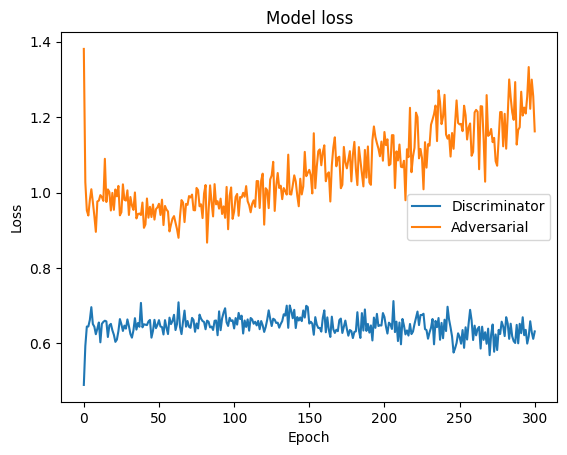

In [30]:
# plotting the metrics
plt.plot(d_loss)
plt.plot(d_g_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Discriminator', 'Adversarial'], loc='center right')
plt.show()

2/2 [==============================] - 0s 5ms/step


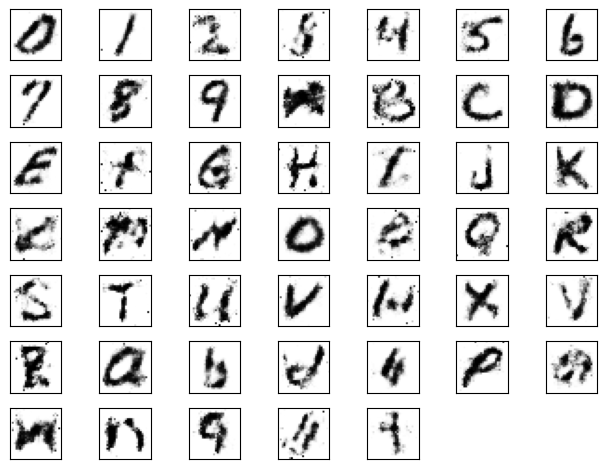

In [46]:
samples = 47
z = np.random.normal(loc=0, scale=1, size=(samples, latent_dim))
labels = np.arange(0, 47).reshape(-1, 1)

x_fake = generator.predict([z, labels])

for k in range(samples):
    plt.subplot(7, 7, k+1)
    plt.imshow(x_fake[k].reshape(28, 28), cmap='binary')
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()